Temperatura da estrela 1 em Kelvin (K):10000
Temperatura da estrela 2 em Kelvin (K):2500


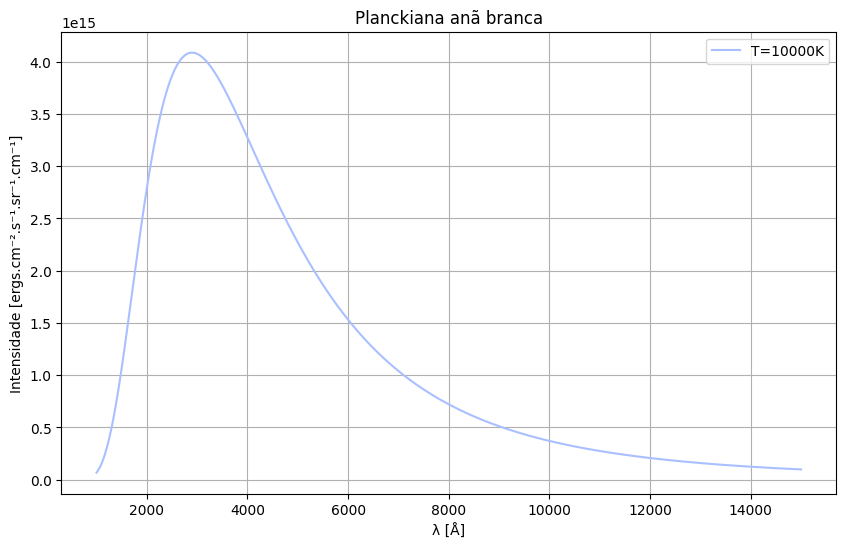

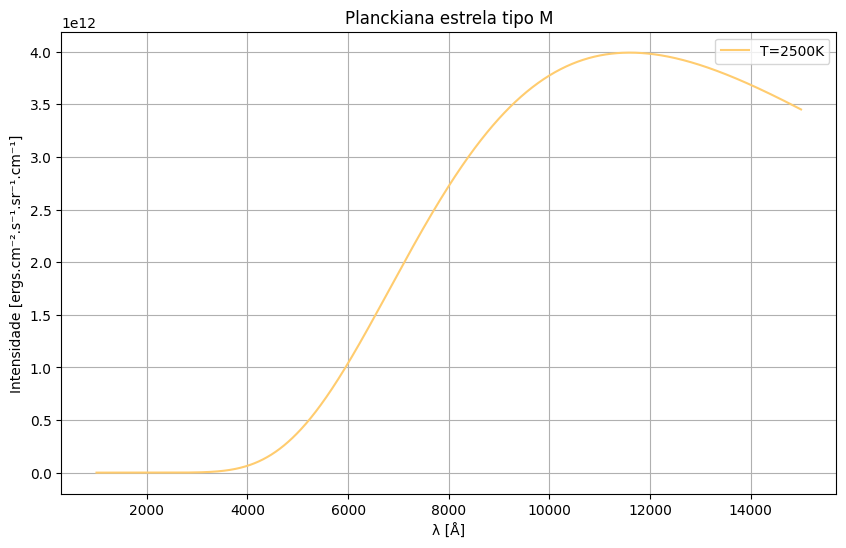

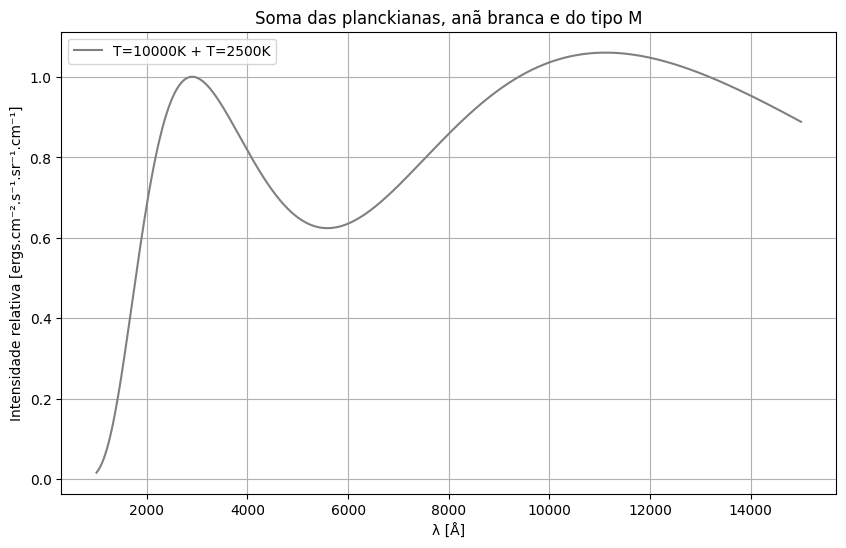

In [5]:
#Bibliotecas utilizadas: / Libraries used:
import matplotlib.pyplot as plt
import numpy as np

#Constantes utilizadas: / Constants used:
h=6.626*(10**(-27)) #Planck: ergs.s
c=29979245800 #Velocidade da luz (speed of light): cm/s
k=1.38*(10**(-16)) #Boltzmann: ergs/K

#Automatização das funções:
#Automation of functions:
T1=int(input("Temperatura da estrela 1 em Kelvin (K):"))
T2=int(input("Temperatura da estrela 2 em Kelvin (K):"))

#Automatização para características das estrela: / Automation for star features:
def tipoestelar(T):
  if T>=30000:
    return "O"
  elif T>=10000:
    return "B"
  elif T>=7500:
    return "A"
  elif T>=6000:
    return "F"
  elif T>=5200:
    return "G"
  elif T>=3700:
    return "K"
  else:
    return "M"

#Definição de cores para os gráficos: / Defining colors for graphs:
corportipo={
    "O":"#9bb0ff",
    "B":"#aabfff",
    "A":"#cad7ff",
    "F":"#f8f7ff",
    "G":"#fff4ea",
    "K":"#ffd2a1",
    "M":"#ffcc6f"
}

#Definição do tipo de estrela individualmente: / Defining the star type individually:
tipo1=tipoestelar(T1)
tipo2=tipoestelar(T2)

#Atribuição de cores: / Color assignment:
cor1=corportipo[tipo1]
cor2=corportipo[tipo2]

#Planckiana B_λ(T1) da primeira estrela: / Planckian B_λ(T1) of the first star:
def Planck1(compond):
  compond_cm=compond*1e-8
  a=2*h*c**2
  b=h*c/(compond_cm*k*T1)
  intensidade1=(a/compond_cm**5)*(1/(np.exp(b)-1))
  return intensidade1

#Planckiana B_λ(T2) da segunda estrela: / Planckian B_λ(T2) of the second star:
def Planck2(compond):
  compond_cm=compond*1e-8
  a=2*h*c**2
  b=h*c/(compond_cm*k*T2)
  intensidade2=(a/compond_cm**5)*(1/(np.exp(b)-1))
  return intensidade2

#Parâmetros x e y dos gráficos: / Graph x and y parameters:
x=np.linspace(1000,15000,1000)
y_1=Planck1(x)
y_2=Planck2(x)

#Normalizando as intensidades para a soma: / Normalizing the intensities to the sum:
y_1_norm=y_1/np.max(y_1)
y_2_norm=y_2/np.max(y_2)
y_sum_norm=y_1_norm+y_2_norm

#Plotagem do gráfico da primeira estrela: / First Star Graph Plot:
plt.figure(figsize=(10,6))
plt.plot(x,y_1,color=cor1,label=f"T={T1}K")
plt.title("Planckiana anã branca")
#plt.title(f"Planckiana estrela tipo {tipo1}") .Caso queira utilizar para uma estrela qualquer, colocar "#" no comando de título acima e apagar "#" desse e esse texto entre pontos / If you want to use it for any star, put "#" in the title command above and delete "#" from this and this text between dots.
plt.xlabel("λ [Å]")
plt.ylabel("Intensidade [ergs.cm⁻².s⁻¹.sr⁻¹.cm⁻¹]")
plt.legend()
plt.grid(True)
plt.show()

#Plotagem do gráfico da segunda estrela: / Second Star Graph Plot:
plt.figure(figsize=(10,6))
plt.plot(x,y_2,color=cor2,label=f"T={T2}K")
plt.title(f"Planckiana estrela tipo {tipo2}")
plt.xlabel("λ [Å]")
plt.ylabel("Intensidade [ergs.cm⁻².s⁻¹.sr⁻¹.cm⁻¹]")
plt.legend()
plt.grid(True)
plt.show()

#Plotagem do gráfico das duas estrelas somadas: / Plot of the graph of the two stars added together:
plt.figure(figsize=(10,6))
plt.plot(x, y_sum_norm, color="gray", label=f"T={T1}K + T={T2}K")
plt.title(f"Soma das planckianas, anã branca e do tipo {tipo2}")
#plt.title(f"Soma das planckianas, estrelas do tipo {tipo1)} e do tipo {tipo2}") .Caso queira utilizar para duas estrelas quaisquer, colocar "#" no comando de título acima e apagar "#" desse e esse texto entre pontos / If you want to use it for any two stars, put "#" in the title command above and delete "#" from this and this text between dots.
plt.xlabel("λ [Å]")
plt.ylabel("Intensidade relativa [ergs.cm⁻².s⁻¹.sr⁻¹.cm⁻¹]")
plt.legend()
plt.grid(True)
plt.show()

#Aproveitem! / Enjoy!